# Rapport - Labb 3

## Intro

Denna rapport undersöker hur datan i dokumentet unlabelled_data.csv kan fördelas i python med hjälp av en rät linje. Den unsersöker också skillnaden mellan olika linjer och deras effektivitet på att dela in datan jämt.

## Metod

Mitt mål i den här rapporten var att klassificera datapunkter via linjär klassificering. Jag valde att använda pandas och matplotlib som hjäpmedel i processen, både för datahanteringen och för visualiseringen. Den generella planen för kodstruktuen var att först läsa in all data och spara den i en pandas dataFrame där man snare lägger till klassifiering i nya kolumner baserat på resultaten av en klassifieringsfunktion.

## Utförande

In [ ]:
import numpy as np #this project uses the exercises_env
import pandas as pd
import matplotlib.pyplot as plt
filePath = r"C:\Users\herrt\Desktop\Git Repos\python-programming-Theodor-Helje\Labs\Labb 3"

def classifyPoint(k, m, xPoint, yPoint):
    yLine = k * xPoint + m
    if yPoint < yLine:
        classification = 0
    else:
        classification = 1
    return(classification)

dataPoints = pd.read_csv(rf"{filePath}\unlabelled_data.csv", header = None)
dataPoints['yx'] = dataPoints.apply(lambda row : classifyPoint(-1, 0, row[0], row[1]), axis = 1)
dataPoints['fx'] = dataPoints.apply(lambda row : classifyPoint(-0.489, 0, row[0], row[1]), axis = 1)
dataPoints['gx'] = dataPoints.apply(lambda row : classifyPoint(-2, 0.16, row[0], row[1]), axis = 1)
dataPoints['hx'] = dataPoints.apply(lambda row : classifyPoint(800, -120, row[0], row[1]), axis = 1)

## Resultat

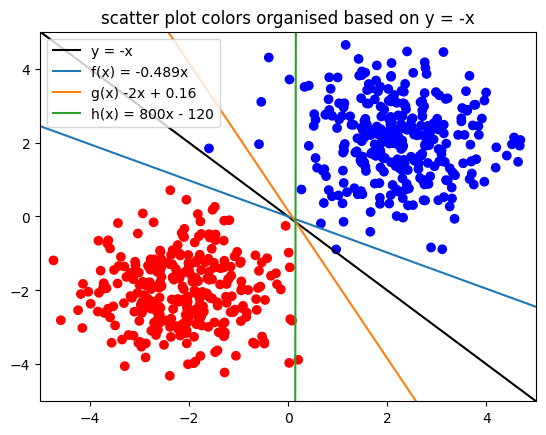

In [26]:
x = np.linspace(-5, 5)
plt.title("scatter plot colors organised based on y = -x")
plt.scatter(dataPoints[0], dataPoints[1], color = ['blue' if i == 1 else 'red' for i in dataPoints['yx']])
plt.plot(x, -x, color = 'black', label = "y = -x")
plt.plot(x, 0.489 * -x, label = "f(x) = -0.489x")
plt.plot(x, 2 * -x + 0.16, label = "g(x) -2x + 0.16")
plt.plot(x, 800 * x - 120, label = "h(x) = 800x - 120")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()

In [27]:
yx = float(sum(dataPoints['yx']) / dataPoints['yx'].count())
fx = float(sum(dataPoints['fx']) / dataPoints['hx'].count())
gx = float(sum(dataPoints['gx']) / dataPoints['hx'].count())
hx = float(sum(dataPoints['hx']) / dataPoints['hx'].count())